In [1]:
import pandas as pd
import numpy as np 
import sidetable 
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None 
df = pd.read_csv('./datos/HU2.csv', index_col = 0)
df.head()

,index,q3,q5,q6,q8,q11,q13,q15,q23,q33,q41,q7,q9,q12,q14,q16,q17,q24,q28,q10,q18,q19,q27,q29,q30,q31,q36,q37,q38,q39,q40,q42
0,0,India,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,No (we do not use ML methods),NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,NaN,"Colab Notebooks,","General purpose image/video tools (PIL, cv2, s...","Word embeddings/vectors (GLoVe, fastText, word...","Google Cloud Platform (GCP) ,","Google Cloud Compute Engine ,","Google Cloud Storage (GCS) ,","No / None,","No / None,",NaN,"No / None,","GitHub , Kaggle ,","Coursera,edX,Kaggle Learn Courses,DataCamp,Uda...","Email newsletters (Data Elixir, O'Reilly Data ..."
1,1,Indonesia,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,< 1 year,We are exploring ML methods (and may one day p...,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,NaN,"Kaggle Notebooks,Colab Notebooks,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Kaggle Learn Courses,Cloud-certification progr...","Journal Publications (peer-reviewed journals, ..."
2,2,Pakistan,Software Engineer,1-3 years,Python,A laptop,Never,I do not use machine learning methods,I do not know,MySQL,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Other,Matplotlib,NaN,NaN,None of these activities are an important par...,NaN,"Kaggle Notebooks,",NaN,NaN,"None,",NaN,NaN,"DataRobot,","No / None,",NaN,"No / None,","I do not share my work publicly,","DataCamp,","Kaggle (notebooks, forums, etc),YouTube (Kaggl..."
3,3,Mexico,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,5-10 years,I do not know,NaN,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",NVIDIA GPUs,Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",Do research that advances the state of the ar...,NaN,"Colab Notebooks,","General purpose image/video tools (PIL, cv2, s...","None,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Coursera,edX,","YouTube (Kaggle YouTube, Cloud AI Adventures, ..."
4,4,India,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,10-20 years,We use ML methods for generating insights (but...,NaN,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,"Google Cloud Datalab,",NaN,NaN,"Microsoft Azure ,","Microsoft Azure Virtual Machines ,","Microsoft Azure Data Lake Storage ,","Azure Machine Learning Studio ,","No / None,",NaN,"Weights & Biases ,","I do not share my work publicly,","Kaggle Learn Courses,Udemy,","Journal Publications (peer-reviewed journals, ..."


In [2]:
df['q6'].unique()

array(['5-10 years', '20+ years', '1-3 years', '< 1 years', '3-5 years',
       '10-20 years', 'I have never written code'], dtype=object)

In [3]:
df_q18 = df['q18'].reset_index()
df_q18

,index,q18
0,0,"General purpose image/video tools (PIL, cv2, s..."
1,1,NaN
2,2,NaN
3,3,"General purpose image/video tools (PIL, cv2, s..."
4,4,NaN
...,...,...
25968,25968,"General purpose image/video tools (PIL, cv2, s..."
25969,25969,NaN
25970,25970,NaN
25971,25971,NaN


In [4]:
#q18

def quitar_comillas (col):
        try:
            return col.split(',')
        except:
            np.nan

In [5]:
df_q18['q18'] = df_q18['q18'].apply(quitar_comillas)

In [6]:
df_18_explode = df_q18['q18'].explode().reset_index()

In [7]:
df_18_explode

,index,q18
0,0,General purpose image/video tools (PIL
1,0,cv2
2,0,skimage
3,0,etc)
4,0,
...,...,...
89510,25968,
89511,25969,None
89512,25970,None
89513,25971,None


In [8]:
df_18_explode['q18'].unique()

array(['General purpose image/video tools (PIL', ' cv2', ' skimage',
       ' etc)', '', None, 'Image segmentation methods (U-Net',
       ' Mask R-CNN', 'Object detection methods (YOLOv3', ' RetinaNet',
       'Image classification and other general purpose networks (VGG',
       ' Inception', ' ResNet', ' ResNeXt', ' NASNet', ' EfficientNet',
       'Generative Networks (GAN', ' VAE', 'None', 'Other'], dtype=object)

In [9]:
gb_18 = df_18_explode.groupby('q18').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [10]:
df_q18 = gb_18.reset_index(name ='count')

In [11]:
df_q18.drop(0, axis = 0,inplace = True)

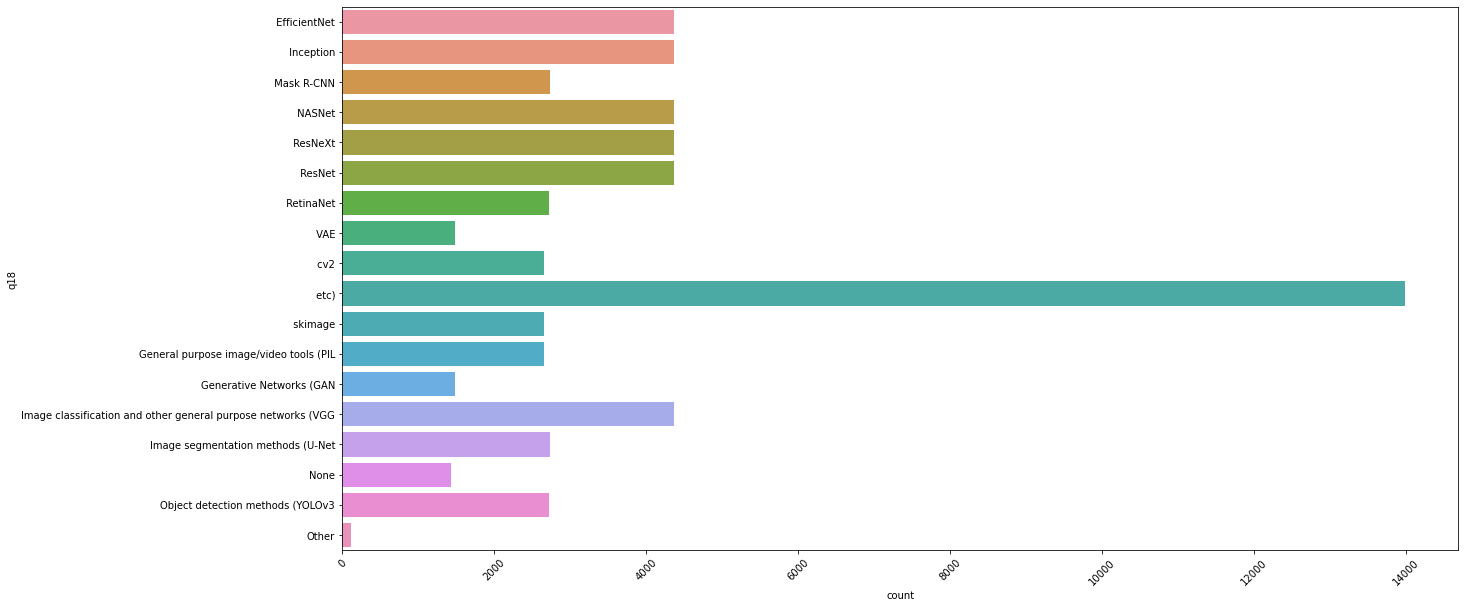

In [12]:
plt.figure(figsize = (20,10))
sns.barplot(x ='count', y = 'q18', data = df_q18)
plt.xticks(rotation = 45);

In [13]:
#q19

df_q19 = df['q19'].reset_index()
df_q19

,index,q19
0,0,"Word embeddings/vectors (GLoVe, fastText, word..."
1,1,NaN
2,2,NaN
3,3,"None,"
4,4,NaN
...,...,...
25968,25968,NaN
25969,25969,NaN
25970,25970,NaN
25971,25971,NaN


In [14]:
def quitar_comillas (col):
        try:
            return col.split(',')
        except:
            np.nan

In [15]:
df_q19['q19'] = df_q19['q19'].apply(quitar_comillas)

In [16]:
df_19_explode = df_q19['q19'].explode().reset_index()

In [17]:
df_19_explode

,index,q19
0,0,Word embeddings/vectors (GLoVe
1,0,fastText
2,0,word2vec)
3,0,
4,1,None
...,...,...
50174,25968,None
50175,25969,None
50176,25970,None
50177,25971,None


In [18]:
df_19_explode['q19'].unique()

array(['Word embeddings/vectors (GLoVe', ' fastText', ' word2vec)', '',
       None, 'None', 'Encoder-decorder models (seq2seq',
       ' vanilla transformers)', 'Contextualized embeddings (ELMo',
       ' CoVe)', 'Transformer language models (GPT-3', ' BERT', ' XLnet',
       ' etc)', 'Other'], dtype=object)

In [19]:
gb_19 = df_19_explode.groupby('q19').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [20]:
df_q19 = gb_19.reset_index(name = 'count')

In [21]:
df_q19.drop(0, axis = 0,inplace = True)

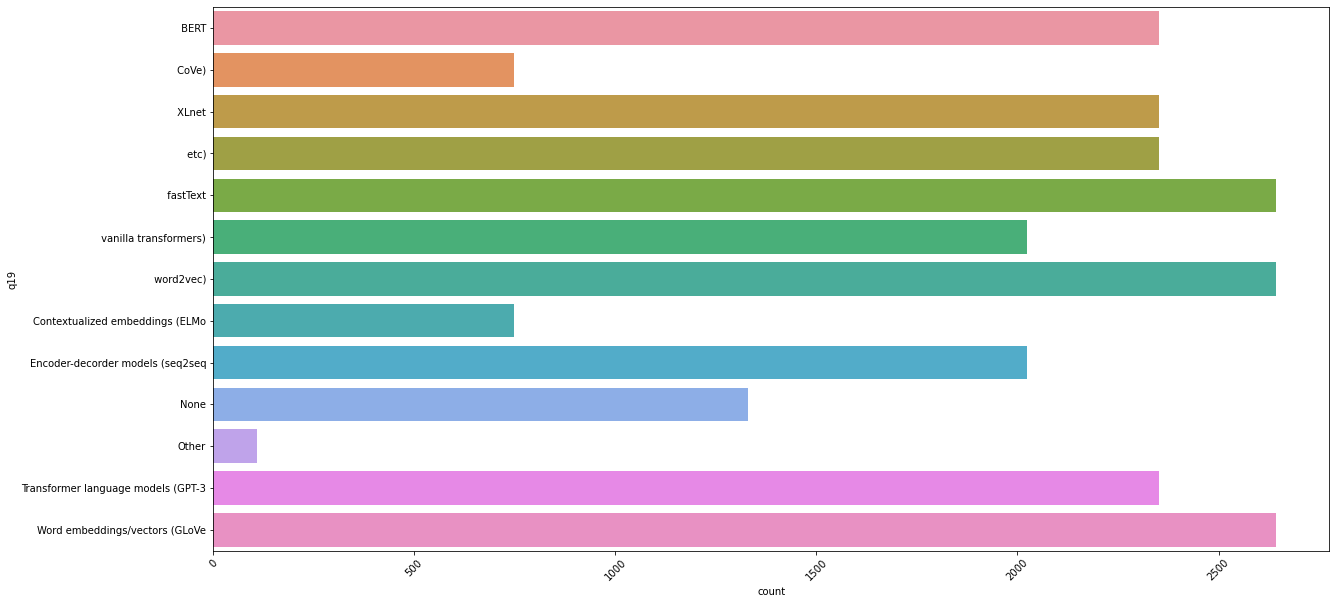

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q19', data = df_q19)
plt.xticks(rotation = 45);

In [23]:
#q27

df_q27 = df['q27'].reset_index()
df_q27

,index,q27
0,0,"Google Cloud Platform (GCP) ,"
1,1,NaN
2,2,"None,"
3,3,NaN
4,4,"Microsoft Azure ,"
...,...,...
25968,25968,"Amazon Web Services (AWS) , Microsoft Azure ,"
25969,25969,NaN
25970,25970,NaN
25971,25971,NaN


In [24]:
def quitar_comillas (col):
        try:
            return col.split(',')
        except:
            np.nan

In [25]:
df_q27['q27'] = df_q27['q27'].apply(quitar_comillas)

In [26]:
df_27_explode = df_q27['q27'].explode().reset_index()

In [27]:
df_27_explode

,index,q27
0,0,Google Cloud Platform (GCP)
1,0,
2,1,None
3,2,None
4,2,
...,...,...
40382,25968,
40383,25969,None
40384,25970,None
40385,25971,None


In [28]:
df_27_explode['q27'].unique()

array([' Google Cloud Platform (GCP) ', '', None, 'None',
       ' Microsoft Azure ', ' Oracle Cloud ',
       ' Amazon Web Services (AWS) ', ' IBM Cloud / Red Hat ',
       ' SAP Cloud ', ' Tencent Cloud ', ' Alibaba Cloud ',
       ' VMware Cloud ', ' Salesforce Cloud ', 'Other'], dtype=object)

In [29]:
gb_27 = df_27_explode.groupby('q27').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [30]:
df_q27 = gb_27.reset_index(name = 'count')

In [31]:
df_q27.drop(0, axis = 0,inplace = True)

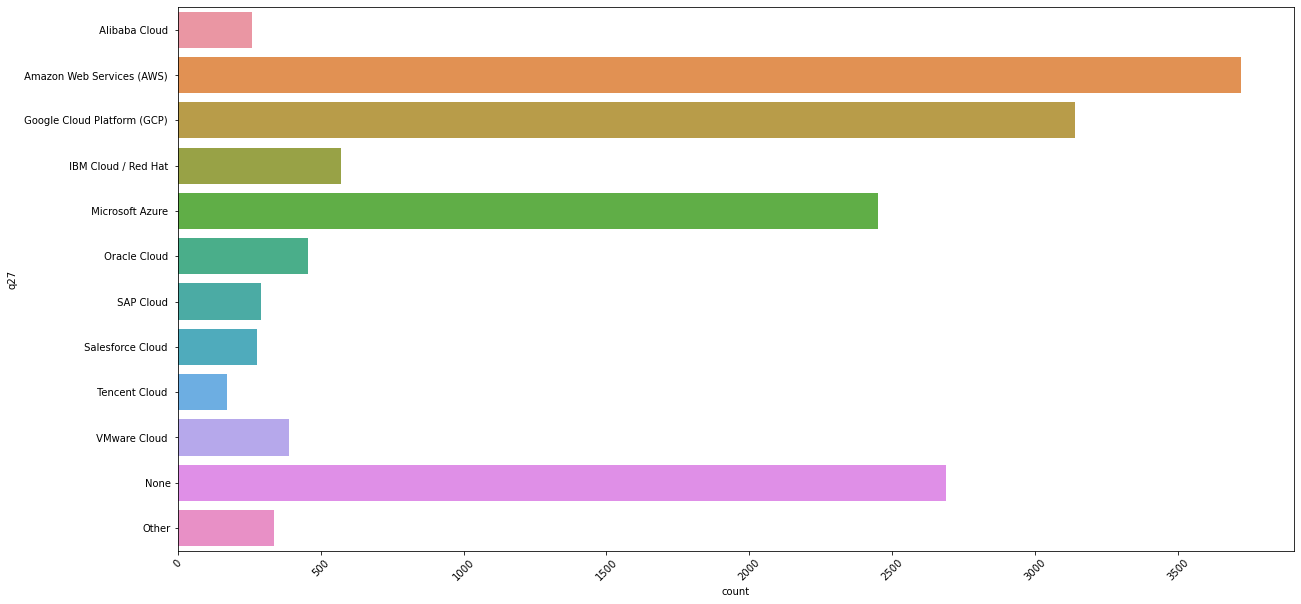

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q27', data = df_q27)
plt.xticks(rotation = 45);